In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf
import matplotlib.mlab as mlab
import scipy.integrate as integrate
import matplotlib.patches as mpatches
import pylab as P

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def null(n):
    rv = np.random.normal(scale=1.0, size=n)
    return(rv)

def alt_1(theta, n):
    rv = np.random.normal(scale=1.0, size=n)
    rv += theta/math.sqrt(n)
    return(rv)

def alt_2(theta, n):
    scale = math.sqrt(1 + theta/math.sqrt(n))
    rv = np.random.normal(scale=scale, size=n)
    return(rv)

def p_from_z(array):
    return(0.5 - 0.5*erf(array))

def cdf(array,t):
    lesser_than_array = np.where(array<t)
    return( (lesser_than_array[0].shape[0]+0.0)/array.shape[0])

In [3]:
# Null Distribution
n = 250
null_values = null(n)
p_null_values = p_from_z(null_values)

In [4]:
#Alternatvie 1
alt_1_values = alt_1(3,n)
p_alt_1_values = p_from_z(alt_1_values)
print(np.var(alt_1_values))

1.09894636662


In [5]:
#Alternatvie 2
alt_2_values = alt_2(3,n)
p_alt_2_values = p_from_z(alt_2_values)
print(math.sqrt(np.var(alt_2_values)))
print(np.var(alt_2_values))

1.08110431938
1.16878654939


In [6]:
#Calculate Wn

def Wn_calc(p_values):
    n = p_values.shape[0]
    p_values.sort()
    integral = (p_values[0]**3)/3
    for i in range(n-1):
        t1 = p_values[i] - (i+0.0)/n
        t2 = p_values[i+1] - (i+0.0)/n
        integral += (t2**3 - t1**3)/3
#     result = integrate.quad(lambda x: (cdf(p_values,x) - x)**2, 0, 1)
#     print(result[0],integral)
#     return p_values.shape[0]*(result[0])
    return integral


In [7]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = 1
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)


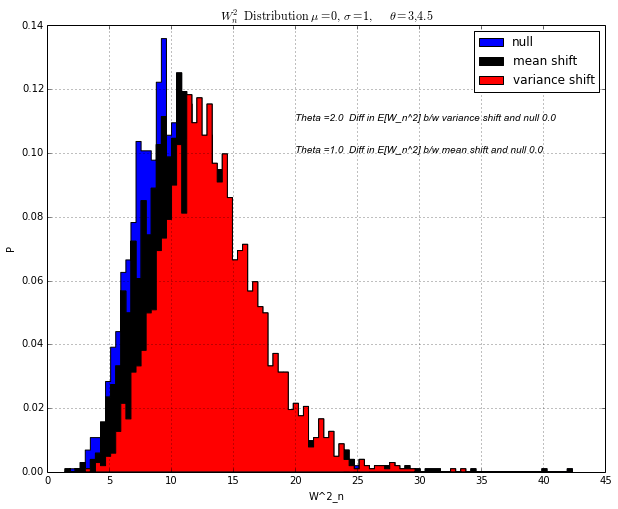

In [8]:

P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])

p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))
P.legend()
P.xlabel('W^2_n')
P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 1.414, 'Difference in E[W_n^2] between mean shift and null', 0.00070134065824693434)
('For theta', 1.414, 'Difference in E[W_n^2] between variance shift and null', 0.001302831848059835)


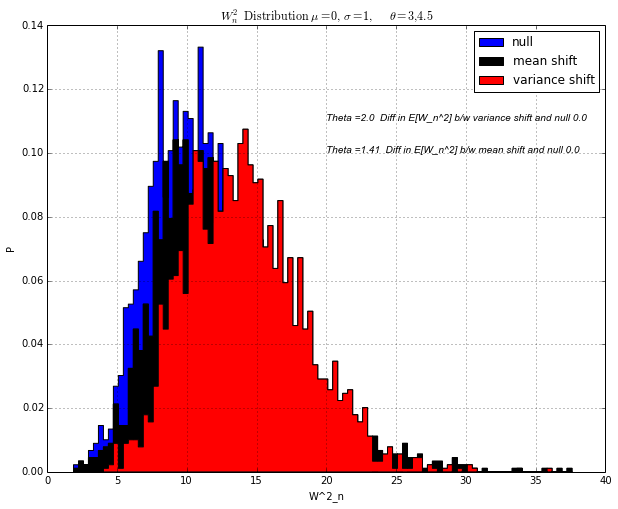

In [9]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)

    
print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])
p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 1.9993959999999997, 'Difference in E[W_n^2] between mean shift and null', 0.0015485227621542036)
('For theta', 1.9993959999999997, 'Difference in E[W_n^2] between variance shift and null', 0.0018901845028980362)


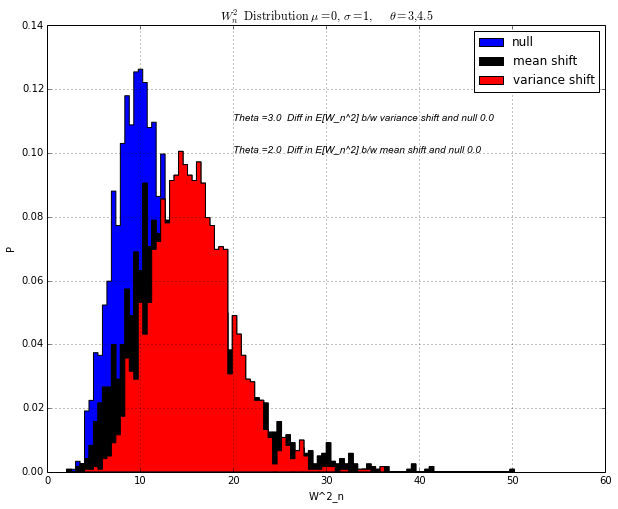

In [10]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)

p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])

P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 2.8271459439999993, 'Difference in E[W_n^2] between mean shift and null', 0.0034343794050472921)
('For theta', 2.8271459439999993, 'Difference in E[W_n^2] between variance shift and null', 0.0027278008307079884)


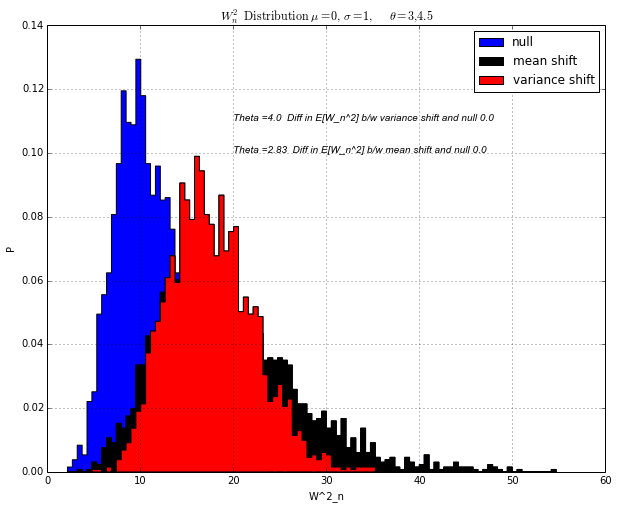

In [11]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)


print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])
p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 3.997584364815999, 'Difference in E[W_n^2] between mean shift and null', 0.0070752254614616572)
('For theta', 3.997584364815999, 'Difference in E[W_n^2] between variance shift and null', 0.0039037296736347286)


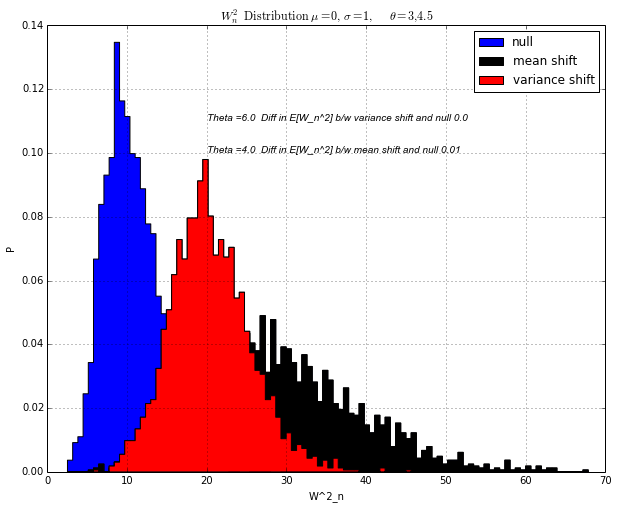

In [12]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)


print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])
p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 5.652584291849823, 'Difference in E[W_n^2] between mean shift and null', 0.014391857414102016)
('For theta', 5.652584291849823, 'Difference in E[W_n^2] between variance shift and null', 0.005387469993351374)


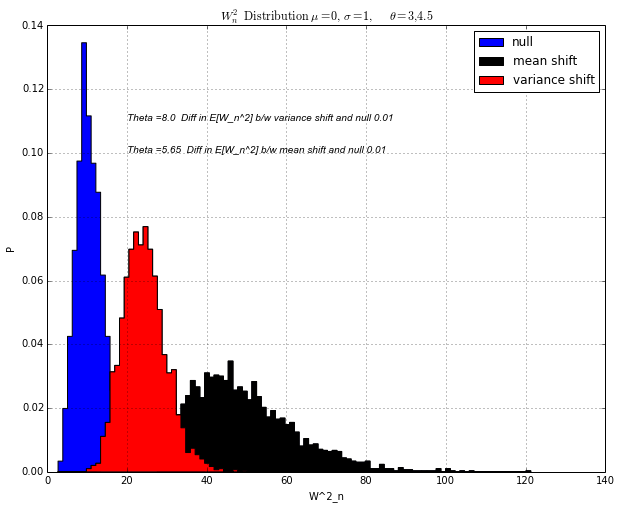

In [13]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)


print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])
p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)


('For theta', 7.992754188675649, 'Difference in E[W_n^2] between mean shift and null', 0.028585908142771288)
('For theta', 7.992754188675649, 'Difference in E[W_n^2] between variance shift and null', 0.0074146059147499358)


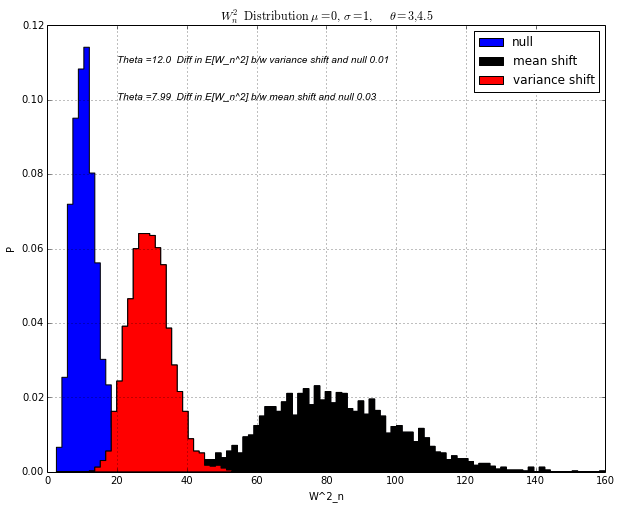

In [14]:
Experiments = 2500
Wn_null  = np.ones(Experiments)
Wn_alt_1 = np.ones(Experiments)
Wn_alt_2 = np.ones(Experiments)
n = 250
theta = theta*1.414
for i in range(Experiments):
    #Null
    null_values = null(n)
    p_null_values = p_from_z(null_values)
    Wn_null[i] = Wn_calc(p_null_values)
    
    #Alt1
    alt1_values = alt_1(theta,n)
    p_alt_1_values = p_from_z(alt1_values)
    Wn_alt_1[i] = Wn_calc(p_alt_1_values)
        
    #Alt2
    alt2_values = alt_2(theta*1.5,n)
    p_alt_2_values = p_from_z(alt2_values)
    Wn_alt_2[i] = Wn_calc(p_alt_2_values)


print("For theta", theta, "Difference in E[W_n^2] between mean shift and null", np.average(Wn_alt_1)-np.average(Wn_null))
print("For theta", theta, "Difference in E[W_n^2] between variance shift and null", np.average(Wn_alt_2)-np.average(Wn_null))
P.hist([Wn_alt_2*Experiments,Wn_alt_1*Experiments,Wn_null*Experiments], 100, normed=1, histtype='stepfilled',
                            color=['red', 'black', 'blue'],
                            label=['variance shift', 'mean shift', 'null'])
p1 = "Theta ="+str(round(theta,2))+ "  Diff in E[W_n^2] b/w mean shift and null "+str( round(np.average(Wn_alt_1)-np.average(Wn_null),2))
p2 = "Theta ="+str(round(theta*1.5))+ "  Diff in E[W_n^2] b/w variance shift and null "+str( round(np.average(Wn_alt_2)-np.average(Wn_null),2))

P.text(20, .11, p2, style='italic')
P.text(20, .1, p1, style='italic')
P.legend()
P.xlabel('W^2_n')
P.ylabel('P')
P.title(r'$W^2_n \mathrm{\ Distribution}\ \mu=0,\ \sigma=1, \quad \theta = 3, 4.5$')
P.grid(True)
